In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import Birch
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv('CensusCanada2016Training.csv')

In [3]:
df.columns = df.columns.str.replace(' ', '_')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total_Population                                                           5000 non-null   int64  
 1   Total_Households                                                           5000 non-null   int64  
 2   Median_Household_Income_(Current_Year_$)                                   5000 non-null   float64
 3   Total_Households_For_Period_Of_Construction                                5000 non-null   int64  
 4   Total_Households_For_Period_Of_Construction_Built_Before_1961              5000 non-null   int64  
 5   Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980    5000 non-null   int64  
 6   Total_Households_For_Period_Of_Construction_Built_Betwee

In [5]:
df.shape

(5000, 15)

drop all rows with income and household zero 

In [6]:
#df = df[~(df[['Total_Households','Median_Household_Income_(Current_Year_$)']] == 0).any(axis=1)]

In [7]:
#df.shape #20 rows dropped

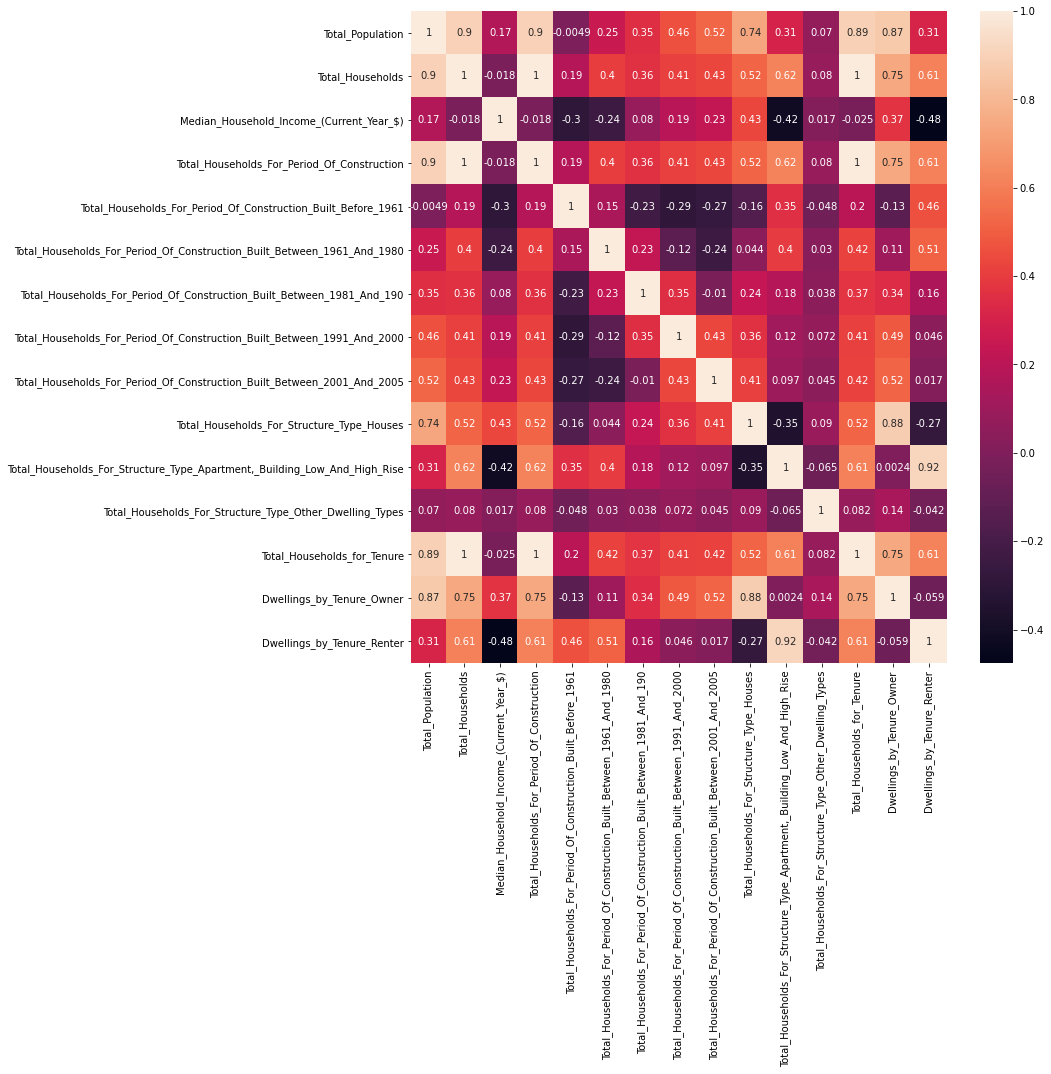

In [8]:
# Check correlations
plt.figure(figsize = (12,12))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Target Variable: Median_Household_Income_(Current_Year_$)

#### 1a. Derive three more columns for more business insights: 
1. Density = population / households : average population in one household 
2. Total_Households_Built_between_2005_2016
3. (Exclude as it is similar to 2) Percentage of the new households built during period 2005 - 2016


In [9]:
df.shape

(5000, 15)

In [10]:
df['Density'] = (df['Total_Population']/df['Total_Households']).fillna(0) #fill in 0 to resolve the division by zero problem
#df.replace([np.inf, -np.inf], np.nan, inplace=True)
#df['Density'].fillna(0, inplace=True)

df['Total_Households_Built_before_2005'] = df.iloc[:, 5:9].sum(axis=1)
df['Total_Households_Built_Between_2006_2016'] = df['Total_Households_For_Period_Of_Construction'] - df['Total_Households_Built_before_2005']
#df['Percentage_of_New_Households_2005_2016'] = (df['Total_Households_Built_Between_2005_2016']/df['Total_Households_For_Period_Of_Construction']).fillna(0) 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Total_Population                                                           5000 non-null   int64  
 1   Total_Households                                                           5000 non-null   int64  
 2   Median_Household_Income_(Current_Year_$)                                   5000 non-null   float64
 3   Total_Households_For_Period_Of_Construction                                5000 non-null   int64  
 4   Total_Households_For_Period_Of_Construction_Built_Before_1961              5000 non-null   int64  
 5   Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980    5000 non-null   int64  
 6   Total_Households_For_Period_Of_Construction_Built_Betwee

In [12]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df['Density'].fillna(0, inplace=True)
df.describe()

,Total_Population,Total_Households,Median_Household_Income_(Current_Year_$),Total_Households_For_Period_Of_Construction,Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,"Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise",Total_Households_For_Structure_Type_Other_Dwelling_Types,Total_Households_for_Tenure,Dwellings_by_Tenure_Owner,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_before_2005,Total_Households_Built_Between_2006_2016
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000
mean,4866.967400,1927.776200,77241.071536,1927.776200,386.510600,555.437800,260.48240,237.92820,138.595600,1134.79180,777.188400,15.796000,1810.954800,1182.21140,628.155800,2.566799,1192.444000,735.33220
std,2491.841571,974.811432,33371.567357,974.811432,416.908471,448.327845,257.86717,265.43332,221.809214,812.09222,891.021549,62.949187,897.938845,710.51703,594.295093,0.930910,678.348672,689.34624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
25%,3289.750000,1333.750000,53040.835000,1333.750000,47.000000,192.000000,74.00000,58.00000,17.000000,534.00000,146.000000,0.000000,1258.000000,687.00000,201.000000,2.211260,673.000000,268.00000
50%,4655.000000,1825.000000,76206.780000,1825.000000,238.000000,470.000000,181.00000,143.00000,52.000000,1076.00000,487.000000,2.000000,1724.500000,1112.00000,456.000000,2.537245,1167.500000,590.00000
75%,6233.750000,2428.250000,95438.495000,2428.250000,613.000000,830.000000,369.00000,325.00000,157.000000,1592.00000,1119.000000,6.000000,2281.250000,1570.00000,879.000000,2.849898,1657.000000,1015.00000
max,30789.000000,15388.000000,669559.560000,15388.000000,2411.000000,3547.000000,1740.00000,2360.00000,2262.000000,9123.00000,15248.000000,1378.000000,11891.000000,8628.00000,6813.000000,49.250000,4771.000000,12377.00000


#### 1b. Drop the predictors with high correlations with each other (ideally all correlations < 0.7)

1. Drop total households, total households by period, total households for tenure, total households built before 2005 as we have their detailed breakdown columns to capture the characteristics

Assumption: the difference between Total_Households_for_Tenure and the sum of Dwellings_by_Tenure_Owner and Dwellings_by_Tenure_Renter is minor and this might due to "bad housing"? 

2. Drop Dwellings_by_Tenure_Owner as it's highly correlated with population and households structure type, and keeping the Dwellings_by_Tenure_Renter is sufficient

3. Similar reasonings for dropping Total_Households_For_Structure_Type_Apartment

4. Keep either Total_Households_Built_before_2005 or Percentage_of_New_Households_2005_2016

In [13]:
df = df.drop(['Total_Households',
               'Total_Households_For_Period_Of_Construction', 
               'Total_Households_for_Tenure',
               'Total_Households_Built_before_2005',
               'Dwellings_by_Tenure_Owner', 
               'Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise'
               ], axis=1)

In [14]:
# there is no missing values
df.isnull().sum()

Total_Population                                                           0
Median_Household_Income_(Current_Year_$)                                   0
Total_Households_For_Period_Of_Construction_Built_Before_1961              0
Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980    0
Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190     0
Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000    0
Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005    0
Total_Households_For_Structure_Type_Houses                                 0
Total_Households_For_Structure_Type_Other_Dwelling_Types                   0
Dwellings_by_Tenure_Renter                                                 0
Density                                                                    0
Total_Households_Built_Between_2006_2016                                   0
dtype: int64

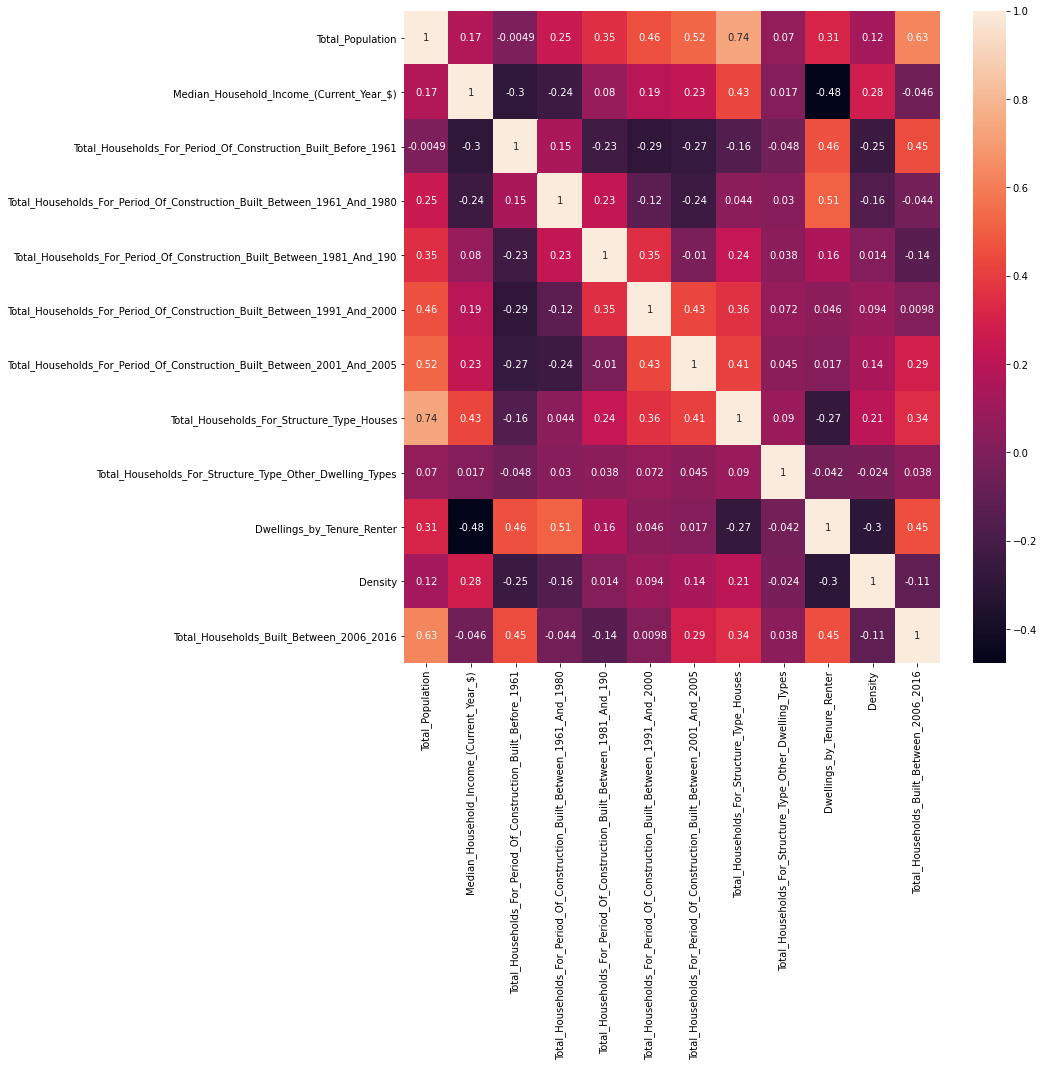

In [15]:
plt.figure(figsize = (12,12))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:xlabel='Total_Population', ylabel='Total_Households_For_Structure_Type_Houses'>

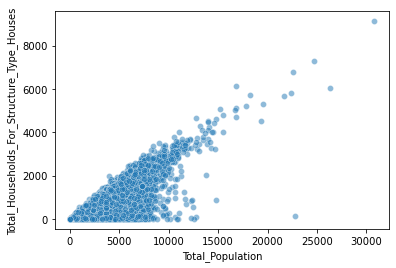

In [16]:
#scatter plot to see the highest correlation we have ~0.74
sns.scatterplot(x=df['Total_Population'], y=df['Total_Households_For_Structure_Type_Houses'], alpha=0.5)

Normalize each households by period to get rid of the different time length problem? 

drop all rows with income and household zero 

In [17]:
df_copy = df.copy()

In [18]:
df = df[~(df[['Median_Household_Income_(Current_Year_$)']] == 0).any(axis=1)]

In [19]:
df.shape

(4980, 12)

### K means clustering

#### 1c. Choose k

In [20]:
np.random.seed(1)
# Normalize the data for clustering 
scaler = StandardScaler().fit(df)
scaled_df = scaler.transform(df)
#pd.DataFrame(scaled_df)
#df.shape

In [21]:
normalized_df=(df-df.mean())/df.std()
normalized_df

,Total_Population,Median_Household_Income_(Current_Year_$),Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,Total_Households_For_Structure_Type_Other_Dwelling_Types,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_Between_2006_2016
0,-0.337183,-0.281441,-0.156017,-0.800885,-0.808706,-0.214222,1.741931,-0.281730,-0.172188,-0.347856,0.254931,-0.373338
1,-1.032169,0.321104,1.292343,-1.088934,-0.956076,-0.888329,-0.626586,-0.428549,-0.188044,-0.702985,-0.334406,0.289799
2,0.157217,0.795183,-0.923361,0.110154,1.184666,1.552015,-0.149281,0.343791,-0.235612,-0.420228,-0.032170,-0.868151
3,0.436099,0.158581,-0.611627,2.539591,-0.052466,-0.602116,-0.626586,0.317882,-0.251468,0.296763,0.143149,-0.808657
4,-0.262519,0.426189,-0.930555,-1.229609,-0.521723,2.632846,0.017326,-0.278029,-0.251468,-0.788822,0.444341,-0.775283
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.927638,0.945440,-0.930555,-1.238541,-0.894026,0.987120,0.616210,-0.263224,-0.251468,-1.014354,0.150832,-0.865249
4996,1.674723,-0.266520,0.695254,0.956438,0.482720,0.452353,1.390706,1.540547,0.303493,0.700701,-0.256492,1.366489
4997,-0.079692,-0.186859,-0.537291,-0.162264,0.967489,1.069971,-0.496003,-0.570432,2.602617,-0.144204,-0.111823,-0.567780
4998,-0.489741,-0.583280,0.373929,-0.832146,-0.859122,-0.541861,-0.568049,-0.423614,-0.251468,-0.477453,1.046824,-0.048299


In [22]:
ks = range(1,11)
inertias = []
for k in ks: 
    model = KMeans(n_clusters = k)
    model.fit(scaled_df)
    inertias.append(model.inertia_)
    
inertias

[59760.00000000006,
 49259.99403403805,
 43149.73679999461,
 39275.111827526925,
 36360.616426011904,
 33937.61686407529,
 31042.538587714294,
 29025.997217564967,
 27175.2765348994,
 25938.654631711837]

([<matplotlib.axis.XTick at 0x7f914a030a10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

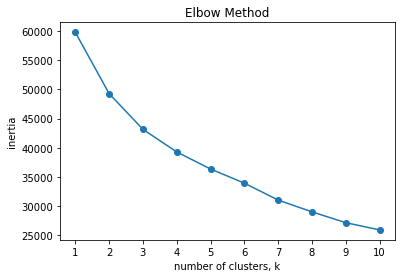

In [23]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.xticks(ks)

Elbow method suggests that the inertia is decreasing with the number of clusters. 

Next, we look at silhouette score which is a measure of how each point in one cluster is to points in the neighboring clusters. We want the distance between clusters as far as possible. 

In [24]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(scaled_df)
  labels = kmeans.labels_
  sil.append(silhouette_score(scaled_df, labels, metric = 'euclidean'))

sil

[0.24867474151727212,
 0.18019314317732452,
 0.1813257512211941,
 0.1859673556485884,
 0.18687706044817615,
 0.1883362616103174,
 0.18625190500582722,
 0.179767882195903,
 0.18541634543294191]

([<matplotlib.axis.XTick at 0x7f914abbdd90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

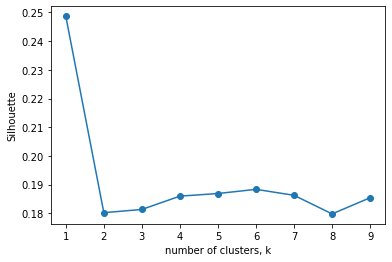

In [25]:
plt.plot(range(1, kmax), sil, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Silhouette')
plt.xticks(range(1, kmax))

At k=4, we have a local maximum for Silhouette score. Although for all k, the silhouette score is ranging between 0.16 and 0.25, we need to take into consideration that the dataset is a small real-world dataset and it is too noisy to find a optimal k wither silhouette score larger than 0.5.  

#### 1d Cluster Profile

In [26]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_df)
pred = kmeans.predict(scaled_df)
centroids = kmeans.cluster_centers_
centroids

array([[ 0.34937874,  0.49342729, -0.55003544,  0.16989777,  0.90397571,
         0.56325741, -0.00442572,  0.55375523,  0.1953285 , -0.37384203,
         0.21567088, -0.42009415],
       [ 0.18067967, -0.73087599,  1.09468237,  0.6495228 , -0.0676099 ,
        -0.2308262 , -0.27529965, -0.44153848, -0.10593229,  1.18403805,
        -0.42829349,  0.55856212],
       [-0.85095122, -0.07848861, -0.1314923 , -0.3683835 , -0.58545195,
        -0.56044451, -0.42580187, -0.53735465, -0.09412763, -0.4825524 ,
        -0.02718275, -0.38583235],
       [ 1.57550536,  0.70459346, -0.71115593, -0.81849401, -0.34895385,
         0.96010613,  2.23268881,  1.43855648,  0.040058  , -0.19139286,
         0.55808131,  1.18023325]])

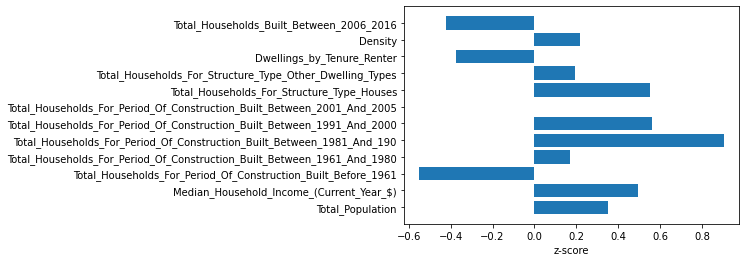

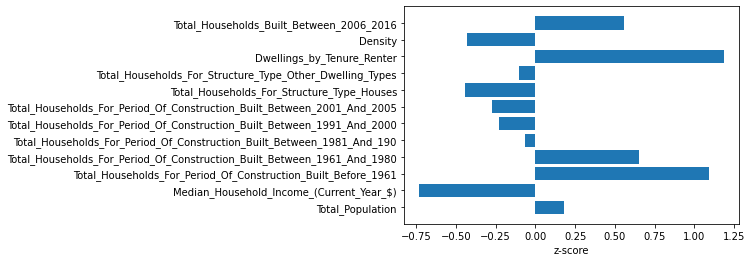

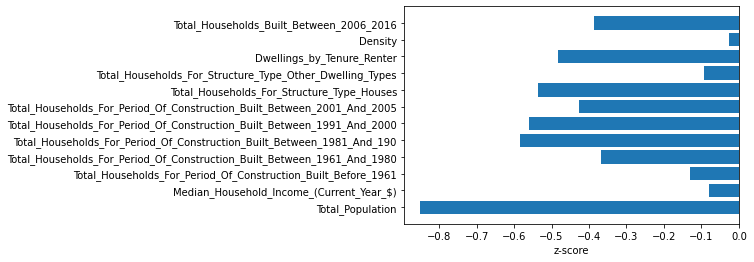

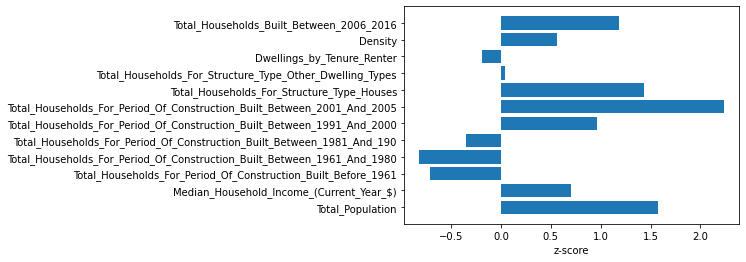

In [27]:
labels = df.columns.tolist()
x = [i for i in range(12)]
#par(mfrow=c(2,2))
for i in range(0,len(centroids)):
    plt.barh(np.arange(len(centroids[i])),centroids[i])
    plt.xlabel('z-score')
    plt.yticks(x, labels)
    plt.show()

In [28]:
normalized_df['kmeans_cluster'] = kmeans.labels_
normalized_df.info()
df['kmeans_cluster'] = kmeans.labels_

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Total_Population                                                         4980 non-null   float64
 1   Median_Household_Income_(Current_Year_$)                                 4980 non-null   float64
 2   Total_Households_For_Period_Of_Construction_Built_Before_1961            4980 non-null   float64
 3   Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980  4980 non-null   float64
 4   Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190   4980 non-null   float64
 5   Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000  4980 non-null   float64
 6   Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005 

In [29]:
df_cluster = pd.DataFrame()
for i in range(4):
    df_cluster0 = normalized_df.loc[normalized_df['kmeans_cluster'] == i]
    df_cluster.insert(i, 'df_cluster'+str(i+1), df_cluster0.mean())
df_cluster

,df_cluster1,df_cluster2,df_cluster3,df_cluster4
Total_Population,0.350084,0.180662,-0.850117,1.575347
Median_Household_Income_(Current_Year_$),0.496582,-0.730803,-0.080424,0.704523
Total_Households_For_Period_Of_Construction_Built_Before_1961,-0.549408,1.094572,-0.132410,-0.711085
Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,0.168321,0.649458,-0.366485,-0.818412
Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,0.903915,-0.067603,-0.583747,-0.348919
Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,0.565162,-0.230803,-0.560710,0.960010
Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,-0.003316,-0.275272,-0.426181,2.232465
Total_Households_For_Structure_Type_Houses,0.554235,-0.441494,-0.536509,1.438412
Total_Households_For_Structure_Type_Other_Dwelling_Types,0.195875,-0.105922,-0.094250,0.040054
Dwellings_by_Tenure_Renter,-0.373548,1.183919,-0.482589,-0.191374


In [30]:
df_cluster = pd.DataFrame()
for i in range(4):
    df_cluster0 = df.loc[df['kmeans_cluster'] == i]
    df_cluster.insert(i, 'df_cluster'+str(i+1), df_cluster0.mean())
df_cluster

,df_cluster1,df_cluster2,df_cluster3,df_cluster4
Total_Population,5753.876217,5334.089611,2780.079641,8789.771084
Median_Household_Income_(Current_Year_$),93976.620396,53378.680262,74891.116955,100854.618896
Total_Households_For_Period_Of_Construction_Built_Before_1961,158.947149,844.524980,332.844644,91.524096
Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,633.049374,848.521808,393.541784,191.150602
Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,494.607093,244.096749,111.006730,171.558233
Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,388.954798,177.597145,89.994952,493.801205
Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,138.415855,78.019826,44.505889,634.937751
Total_Households_For_Structure_Type_Houses,1588.570236,781.507534,704.495794,2305.216867
Total_Households_For_Structure_Type_Other_Dwelling_Types,28.212796,9.179223,9.915311,18.385542
Dwellings_by_Tenure_Renter,408.735049,1334.103886,343.948402,516.973896


Total_Population， Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005，Total_Households_For_Structure_Type_Houses

#### 1e. Birch Clustering

In [31]:
model = Birch(branching_factor = 50, n_clusters = 4)
model.fit(scaled_df)
pred = model.predict(scaled_df)
normalized_df['birch_cluster'] = pred
normalized_df

,Total_Population,Median_Household_Income_(Current_Year_$),Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,Total_Households_For_Structure_Type_Other_Dwelling_Types,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_Between_2006_2016,kmeans_cluster,birch_cluster
0,-0.337183,-0.281441,-0.156017,-0.800885,-0.808706,-0.214222,1.741931,-0.281730,-0.172188,-0.347856,0.254931,-0.373338,2,0
1,-1.032169,0.321104,1.292343,-1.088934,-0.956076,-0.888329,-0.626586,-0.428549,-0.188044,-0.702985,-0.334406,0.289799,2,2
2,0.157217,0.795183,-0.923361,0.110154,1.184666,1.552015,-0.149281,0.343791,-0.235612,-0.420228,-0.032170,-0.868151,0,1
3,0.436099,0.158581,-0.611627,2.539591,-0.052466,-0.602116,-0.626586,0.317882,-0.251468,0.296763,0.143149,-0.808657,0,0
4,-0.262519,0.426189,-0.930555,-1.229609,-0.521723,2.632846,0.017326,-0.278029,-0.251468,-0.788822,0.444341,-0.775283,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.927638,0.945440,-0.930555,-1.238541,-0.894026,0.987120,0.616210,-0.263224,-0.251468,-1.014354,0.150832,-0.865249,2,0
4996,1.674723,-0.266520,0.695254,0.956438,0.482720,0.452353,1.390706,1.540547,0.303493,0.700701,-0.256492,1.366489,3,1
4997,-0.079692,-0.186859,-0.537291,-0.162264,0.967489,1.069971,-0.496003,-0.570432,2.602617,-0.144204,-0.111823,-0.567780,0,1
4998,-0.489741,-0.583280,0.373929,-0.832146,-0.859122,-0.541861,-0.568049,-0.423614,-0.251468,-0.477453,1.046824,-0.048299,2,0


In [32]:
df_cluster_birch = pd.DataFrame()
for i in range(4):
    df_cluster0 = normalized_df.loc[normalized_df['birch_cluster'] == i]
    df_cluster_birch.insert(i, 'df_cluster'+str(i+1), df_cluster0.mean())
df_cluster_birch

,df_cluster1,df_cluster2,df_cluster3,df_cluster4
Total_Population,-0.480538,1.001820,0.045113,0.107445
Median_Household_Income_(Current_Year_$),0.177538,0.648014,-0.647042,0.130607
Total_Households_For_Period_Of_Construction_Built_Before_1961,-0.347691,-0.650861,0.900428,-0.598703
Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,-0.014575,-0.495907,0.316966,0.200910
Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,-0.285606,0.701116,-0.050170,0.403316
Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,-0.378997,1.074085,-0.145867,0.289332
Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,-0.292176,0.968301,-0.193677,0.089907
Total_Households_For_Structure_Type_Houses,-0.149989,1.153601,-0.509740,0.262822
Total_Households_For_Structure_Type_Other_Dwelling_Types,-0.126891,0.064945,-0.113393,6.929968
Dwellings_by_Tenure_Renter,-0.489114,-0.429555,0.955855,-0.485326


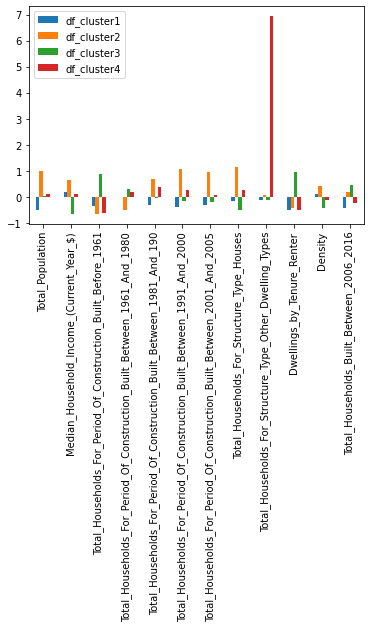

In [33]:
df1 = df_cluster_birch[:-2]
ax = df1.plot.bar(rot=90)

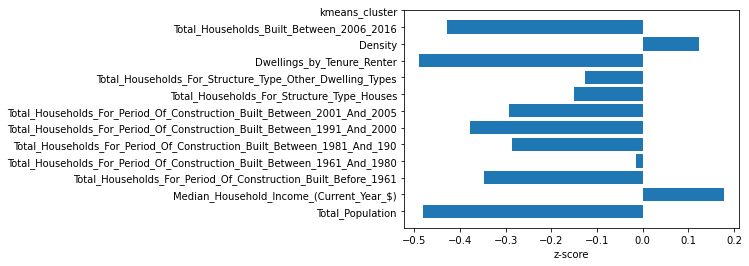

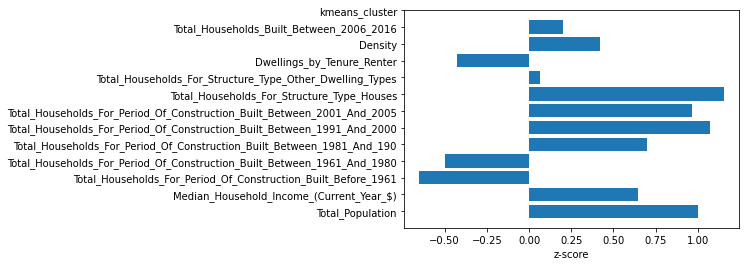

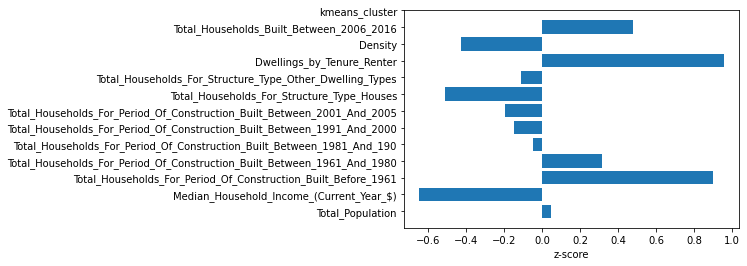

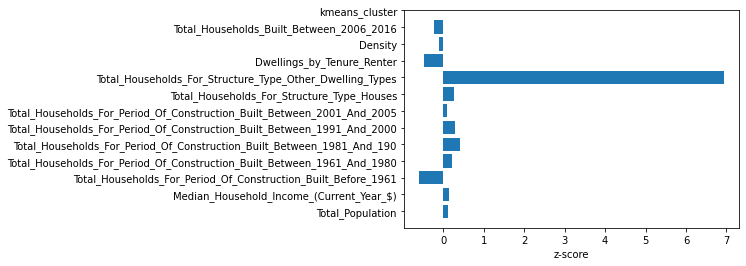

In [34]:
labels = df.columns.tolist()
x = [i for i in range(13)]

for i in range(4):
    plt.barh(np.arange(len(df1.iloc[:,i])), df1.iloc[:,i])
    plt.xlabel('z-score')
    plt.yticks(x, labels)
    plt.show()

#### Value Counts for both clusters

In [35]:
normalized_df['kmeans_cluster'].value_counts()

2    1783
0    1438
1    1261
3     498
Name: kmeans_cluster, dtype: int64

In [36]:
normalized_df['birch_cluster'].value_counts()

0    2269
2    1644
1    1008
3      59
Name: birch_cluster, dtype: int64

### Part 2: Model Selection 

1. KNN
2. CART
3. Random Forest

add 20 empty rows back

In [37]:
import random
random.seed(1)

In [38]:
df_copy.shape

(5000, 12)

In [39]:
X = df_copy.drop(['Median_Household_Income_(Current_Year_$)'], axis = 1)
y = df_copy['Median_Household_Income_(Current_Year_$)']

In [40]:
scaled_X=(X-X.mean())/X.std()
scaled_X

,Total_Population,Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,Total_Households_For_Structure_Type_Other_Dwelling_Types,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_Between_2006_2016
0,-0.327456,-0.152337,-0.795038,-0.804610,-0.210705,1.746566,-0.275574,-0.171503,-0.343526,0.262585,-0.368947
1,-1.018511,1.296422,-1.082774,-0.951972,-0.885074,-0.624841,-0.422109,-0.187389,-0.698568,-0.318848,0.294000
2,0.164149,-0.919892,0.115010,1.188665,1.556217,-0.146953,0.348739,-0.235047,-0.415881,-0.020665,-0.863619
3,0.441454,-0.608073,2.541806,-0.048406,-0.598750,-0.624841,0.322880,-0.250933,0.300935,0.152303,-0.804142
4,-0.253213,-0.927087,-1.223296,-0.517640,2.637468,0.019857,-0.271880,-0.250933,-0.784384,0.449455,-0.770777
...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.914572,-0.927087,-1.232218,-0.889925,0.991103,0.619471,-0.257104,-0.250933,-1.009862,0.159882,-0.860717
4996,1.673073,0.699169,0.960374,0.486753,0.456129,1.394912,1.543185,0.305071,0.704775,-0.241978,1.370382
4997,-0.071420,-0.533716,-0.157112,0.971499,1.073986,-0.494098,-0.563719,2.608517,-0.139923,-0.099250,-0.563334
4998,-0.479151,0.377755,-0.826265,-0.855023,-0.538471,-0.566233,-0.417184,-0.250933,-0.473091,1.043857,-0.044001


([<matplotlib.axis.XTick at 0x7f912ddd2b50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

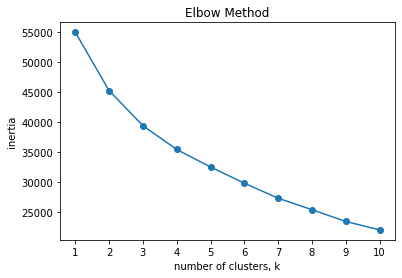

In [41]:
ks = range(1,11)
inertias = []
for k in ks: 
    model = KMeans(n_clusters = k, random_state=1)
    model.fit(scaled_X)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.xticks(ks)

([<matplotlib.axis.XTick at 0x7f9149ede690>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

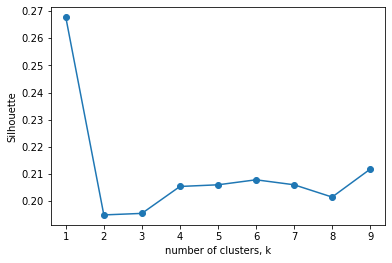

In [42]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters=k, random_state=1).fit(scaled_X)
  labels = kmeans.labels_
  sil.append(silhouette_score(scaled_X, labels, metric = 'euclidean'))

plt.plot(range(1, kmax), sil, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Silhouette')
plt.xticks(range(1, kmax))

k=5 is the local maximum. 

In [43]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(scaled_X)
pred = kmeans.predict(scaled_X)

In [44]:
scaled_X['kmeans_cluster'] = kmeans.labels_
scaled_X['kmeans_cluster'].value_counts()

0    1877
1    1377
2    1215
4     455
3      76
Name: kmeans_cluster, dtype: int64

#### Cluster 0 - KNN

In [45]:
filter0 = scaled_X['kmeans_cluster']==0
filter0

0        True
1        True
2       False
3       False
4       False
        ...  
4995     True
4996    False
4997    False
4998     True
4999    False
Name: kmeans_cluster, Length: 5000, dtype: bool

In [46]:
y = pd.DataFrame(y)

In [222]:
X0 = scaled_X[scaled_X['kmeans_cluster']==0].drop(['kmeans_cluster'], axis = 1)
y0 = y[scaled_X['kmeans_cluster']==0]
y0 = y0.squeeze()
y0.shape

(1877,)

In [48]:
test_size=0.3
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=test_size, random_state=seed)

In [49]:
num_folds = 5
scoring = 'neg_mean_absolute_error'

In [50]:
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
msg = "KNN: %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)

KNN: -16757.324879 (1033.934265)


In [51]:
k_values = np.arange(1,22)
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid=GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -16316.267451 using {'n_neighbors': 10}


In [52]:
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%F (%F) with: %r" % (mean, stdev, param))

-21925.254231 (1362.646701) with: {'n_neighbors': 1}
-19120.113199 (1233.855093) with: {'n_neighbors': 2}
-18041.462196 (1323.979775) with: {'n_neighbors': 3}
-17112.928717 (1130.793075) with: {'n_neighbors': 4}
-16757.324879 (1033.934265) with: {'n_neighbors': 5}
-16648.647741 (943.364800) with: {'n_neighbors': 6}
-16319.791972 (1012.829054) with: {'n_neighbors': 7}
-16339.368806 (1277.360006) with: {'n_neighbors': 8}
-16345.993101 (1316.054758) with: {'n_neighbors': 9}
-16316.267451 (1270.829121) with: {'n_neighbors': 10}
-16506.035605 (1244.111472) with: {'n_neighbors': 11}
-16624.616015 (1188.250475) with: {'n_neighbors': 12}
-16668.091215 (1161.470065) with: {'n_neighbors': 13}
-16885.707469 (1214.583390) with: {'n_neighbors': 14}
-16901.229819 (1301.169524) with: {'n_neighbors': 15}
-16922.564392 (1332.191769) with: {'n_neighbors': 16}
-17084.155547 (1413.688647) with: {'n_neighbors': 17}
-17103.791086 (1460.346041) with: {'n_neighbors': 18}
-17126.665353 (1435.482302) with: {'n_

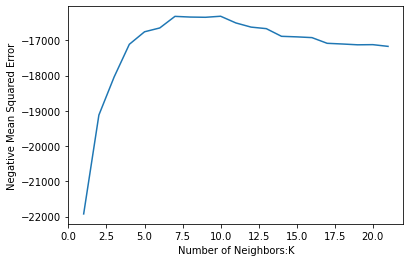

In [53]:
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors:K")
plt.ylabel("Negative Mean Squared Error")
plt.show()

#### Cluster 0 - CART

In [54]:
fullClassTree = tree.DecisionTreeRegressor(random_state=seed)
fullClassTree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [55]:
param_grid_tree = {'max_depth': [10,20,30,40],
             'min_samples_split': [20,40,60,80,100],
             'min_impurity_decrease': [ 0.05,0.005, 0.0001, 0.001, 0.01]}

In [56]:
grid_search_tree = GridSearchCV(tree.DecisionTreeRegressor(random_state=seed),
                                param_grid=param_grid_tree,cv=num_folds,n_jobs=-1)

In [57]:
grid_search_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0.05, 0.005, 0.0001, 0.001,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [58]:
print('Initial score: ',grid_search_tree.best_score_)
print('Parameters: ',grid_search_tree.best_params_)

Initial score:  0.23455536161145885
Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.05, 'min_samples_split': 100}


In [59]:
y_pred1 = grid_search_tree.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred1))

MAE: 17984.89294541966


max_depth': 10, 'min_samples_split': 80

In [60]:
param_grid_tree2 = {'max_depth': [4,6,8,10,12,14],
             'min_samples_split': [70, 75, 80, 85, 90],
             'min_impurity_decrease': [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05]}

In [61]:
grid_search_tree2 = GridSearchCV(tree.DecisionTreeRegressor(random_state=seed),
                                param_grid=param_grid_tree,cv=num_folds,n_jobs=-1)

In [62]:
grid_search_tree2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0.05, 0.005, 0.0001, 0.001,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [63]:
print('Initial score: ',grid_search_tree2.best_score_)
print('Parameters: ',grid_search_tree2.best_params_)

Initial score:  0.23455536161145893
Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.05, 'min_samples_split': 100}


In [64]:
y_pred = grid_search_tree2.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))

MAE: 17855.86190168443


#### Cluster 0 - Random Forest

In [65]:
param_grid_rfc = {'n_estimators' : [30,40,50,60,70,80],
                  'max_depth': [8,10,12,14,16,18,20],
             'min_samples_split': [16,18,20,22,24,26,28],
             'min_impurity_decrease': [0.01,0.005,0.001,0.0001,0.00001]}

In [66]:
grid_search_rfc = GridSearchCV(RandomForestRegressor(random_state=seed),
                               param_grid=param_grid_rfc,cv=5,n_jobs=-1)

In [67]:
grid_search_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 14, 16, 18, 20],
                         'min_impurity_decrease': [0.01, 0.005, 0.001, 0.0001,
                                                   1e-05],
                         'min_samples_split': [16, 18, 20, 22, 24, 26, 28],
                         'n_estimators': [30, 40, 50, 60, 70, 80]})

In [68]:
print('Best score: ',grid_search_rfc.best_score_)
print('Parameters: ',grid_search_rfc.best_params_)

Best score:  0.3492209936603225
Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 26, 'n_estimators': 30}


In [69]:
param_grid_rfc1 = {'n_estimators' : [75,80,85,90,95],
                  'max_depth': [10,11,12,13,14,15],
             'min_samples_split': [16,18,20,22,24,26,28],
             'min_impurity_decrease': [0.02,0.03,0.01,0.009,0.008,0.007]}

In [70]:
grid_search_rfc1 = GridSearchCV(RandomForestRegressor(random_state=seed),
                               param_grid=param_grid_rfc1,cv=5,n_jobs=-1)

In [71]:
grid_search_rfc1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=92), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15],
                         'min_impurity_decrease': [0.02, 0.03, 0.01, 0.009,
                                                   0.008, 0.007],
                         'min_samples_split': [16, 18, 20, 22, 24, 26, 28],
                         'n_estimators': [75, 80, 85, 90, 95]})

In [72]:
print('Best score: ',grid_search_rfc.best_score_)
print('Parameters: ',grid_search_rfc.best_params_)

Best score:  0.3492209936603225
Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 26, 'n_estimators': 30}


In [73]:
y_pred_rf = grid_search_rfc1.predict(X_test)

In [74]:
print('MAE:', mean_absolute_error(y_test, y_pred_rf))

MAE: 16054.103224113987


#### Cluster 1 - KNN

In [221]:
filter1 = scaled_X['kmeans_cluster']==1
filter1

0       False
1       False
2        True
3        True
4        True
        ...  
4995    False
4996    False
4997     True
4998    False
4999     True
Name: kmeans_cluster, Length: 5000, dtype: bool

In [76]:
y = pd.DataFrame(y)

In [77]:
X1 = scaled_X[scaled_X['kmeans_cluster']==1].drop(['kmeans_cluster'], axis = 1)
y1 = y[scaled_X['kmeans_cluster']==1]
y1 = y1.squeeze()
y1.shape

(1377,)

In [78]:
test_size=0.3
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=test_size, random_state=seed)

In [79]:
num_folds = 5
scoring = 'neg_mean_absolute_error'

In [80]:
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
msg = "KNN: %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)

KNN: -13201.901025 (583.422083)


In [81]:
k_values = np.arange(1,22)
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid=GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -12807.458494 using {'n_neighbors': 13}


In [82]:
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%F (%F) with: %r" % (mean, stdev, param))

-15679.428995 (833.505458) with: {'n_neighbors': 1}
-13952.980468 (813.621337) with: {'n_neighbors': 2}
-13538.798079 (790.762799) with: {'n_neighbors': 3}
-13300.068416 (714.433995) with: {'n_neighbors': 4}
-13201.901025 (583.422083) with: {'n_neighbors': 5}
-13087.706684 (698.054738) with: {'n_neighbors': 6}
-13067.686464 (804.584378) with: {'n_neighbors': 7}
-13057.625643 (818.135825) with: {'n_neighbors': 8}
-13021.478997 (816.875707) with: {'n_neighbors': 9}
-12948.831715 (787.707125) with: {'n_neighbors': 10}
-12879.609123 (904.685425) with: {'n_neighbors': 11}
-12837.127803 (938.064884) with: {'n_neighbors': 12}
-12807.458494 (983.244345) with: {'n_neighbors': 13}
-12847.569956 (967.096227) with: {'n_neighbors': 14}
-12870.213659 (947.631840) with: {'n_neighbors': 15}
-12871.221093 (902.380209) with: {'n_neighbors': 16}
-12880.959864 (855.716760) with: {'n_neighbors': 17}
-12875.830871 (837.469108) with: {'n_neighbors': 18}
-12875.417364 (892.874998) with: {'n_neighbors': 19}
-1

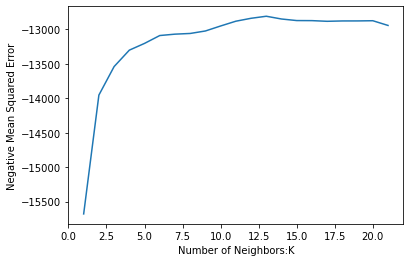

In [83]:
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors:K")
plt.ylabel("Negative Mean Squared Error")
plt.show()

#### Cluster 1 - CART

In [84]:
fullClassTree = tree.DecisionTreeRegressor(random_state=seed)
fullClassTree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [85]:
param_grid_tree = {'max_depth': [10,20,30,40],
             'min_samples_split': [20,40,60,80,100],
             'min_impurity_decrease': [ 0.05,0.005, 0.0001, 0.001, 0.01]}

In [86]:
grid_search_tree = GridSearchCV(tree.DecisionTreeRegressor(random_state=seed),
                                param_grid=param_grid_tree,cv=num_folds,n_jobs=-1)

In [87]:
grid_search_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0.05, 0.005, 0.0001, 0.001,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [88]:
print('Initial score: ',grid_search_tree.best_score_)
print('Parameters: ',grid_search_tree.best_params_)

Initial score:  0.4799217901872693
Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.05, 'min_samples_split': 100}


max_depth': 10, 'min_samples_split': 80

Tune the model

In [89]:
param_grid_tree2 = {'max_depth': [4,6,8,10,12,14],
             'min_samples_split': [90,100,110,120],
             'min_impurity_decrease': [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]}

In [90]:
grid_search_tree2 = GridSearchCV(tree.DecisionTreeRegressor(random_state=seed),
                                param_grid=param_grid_tree,cv=num_folds,n_jobs=-1)

In [91]:
grid_search_tree2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0.05, 0.005, 0.0001, 0.001,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [92]:
print('Initial score: ',grid_search_tree2.best_score_)
print('Parameters: ',grid_search_tree2.best_params_)

Initial score:  0.4799217901872693
Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.05, 'min_samples_split': 100}


In [93]:
y_pred = grid_search_tree2.predict(X_test)

In [94]:
print('MAE:', mean_absolute_error(y_test, y_pred))

MAE: 11947.4879295818


In [95]:
y_pred1 = grid_search_tree.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred1))

MAE: 11947.4879295818


#### Cluster 1 - Random Forest

In [97]:
param_grid_rfc = {'n_estimators' : [30,40,50,60,70,80],
                  'max_depth': [8,10,12,14,16,18,20],
             'min_samples_split': [16,18,20,22,24,26,28],
             'min_impurity_decrease': [0.01,0.005,0.001,0.0001,0.00001]}

In [98]:
grid_search_rfc = GridSearchCV(RandomForestRegressor(random_state=seed),
                               param_grid=param_grid_rfc,cv=5,n_jobs=-1)

In [99]:
grid_search_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 14, 16, 18, 20],
                         'min_impurity_decrease': [0.01, 0.005, 0.001, 0.0001,
                                                   1e-05],
                         'min_samples_split': [16, 18, 20, 22, 24, 26, 28],
                         'n_estimators': [30, 40, 50, 60, 70, 80]})

In [100]:
print('Best score: ',grid_search_rfc.best_score_)
print('Parameters: ',grid_search_rfc.best_params_)

Best score:  0.5256108499954322
Parameters:  {'max_depth': 14, 'min_impurity_decrease': 0.01, 'min_samples_split': 18, 'n_estimators': 80}


In [101]:
param_grid_rfc1 = {'n_estimators' : [36,38,40,42,44,46],
                  'max_depth': [16,17,18,19,20,21],
             'min_samples_split': [16,18,20,22,24,26,28],
             'min_impurity_decrease': [0.02,0.03,0.01,0.009,0.008,0.007]}

In [102]:
grid_search_rfc1 = GridSearchCV(RandomForestRegressor(random_state=seed),
                               param_grid=param_grid_rfc1,cv=5,n_jobs=-1)

In [103]:
grid_search_rfc1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=92), n_jobs=-1,
             param_grid={'max_depth': [16, 17, 18, 19, 20, 21],
                         'min_impurity_decrease': [0.02, 0.03, 0.01, 0.009,
                                                   0.008, 0.007],
                         'min_samples_split': [16, 18, 20, 22, 24, 26, 28],
                         'n_estimators': [36, 38, 40, 42, 44, 46]})

In [104]:
print('Best score: ',grid_search_rfc.best_score_)
print('Parameters: ',grid_search_rfc.best_params_)

Best score:  0.5256108499954322
Parameters:  {'max_depth': 14, 'min_impurity_decrease': 0.01, 'min_samples_split': 18, 'n_estimators': 80}


In [105]:
y_pred_rf = grid_search_rfc1.predict(X_test)

In [106]:
print('MAE:', mean_absolute_error(y_test, y_pred_rf))

MAE: 10633.903280969345


#### Cluster 2 - KNN

In [107]:
filter2 = scaled_X['kmeans_cluster']==2
filter2

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: kmeans_cluster, Length: 5000, dtype: bool

In [108]:
y = pd.DataFrame(y)

In [109]:
X2 = scaled_X[scaled_X['kmeans_cluster']==2].drop(['kmeans_cluster'], axis = 1)
y2 = y[scaled_X['kmeans_cluster']==2]
y2 = y2.squeeze()
y2.shape

(1215,)

In [110]:
test_size=0.3
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=test_size, random_state=seed)

In [111]:
num_folds = 5
scoring = 'neg_mean_absolute_error'

In [112]:
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
msg = "KNN: %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)

KNN: -11437.240151 (707.487703)


In [113]:
k_values = np.arange(1,22)
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid=GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -10904.624314 using {'n_neighbors': 14}


In [114]:
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%F (%F) with: %r" % (mean, stdev, param))

-14024.440459 (1262.609705) with: {'n_neighbors': 1}
-12541.997341 (923.610565) with: {'n_neighbors': 2}
-12034.795380 (730.730045) with: {'n_neighbors': 3}
-11672.965497 (685.349317) with: {'n_neighbors': 4}
-11437.240151 (707.487703) with: {'n_neighbors': 5}
-11330.555369 (778.428059) with: {'n_neighbors': 6}
-11140.068649 (743.535885) with: {'n_neighbors': 7}
-11026.983347 (775.663224) with: {'n_neighbors': 8}
-11068.466239 (694.467959) with: {'n_neighbors': 9}
-11055.799527 (634.543817) with: {'n_neighbors': 10}
-10978.730957 (505.227438) with: {'n_neighbors': 11}
-10982.098299 (554.481371) with: {'n_neighbors': 12}
-10911.022713 (501.046155) with: {'n_neighbors': 13}
-10904.624314 (472.408519) with: {'n_neighbors': 14}
-10910.939300 (477.019654) with: {'n_neighbors': 15}
-10933.349309 (454.981474) with: {'n_neighbors': 16}
-10942.568844 (459.165903) with: {'n_neighbors': 17}
-10965.194229 (465.155111) with: {'n_neighbors': 18}
-10955.728962 (430.493235) with: {'n_neighbors': 19}
-

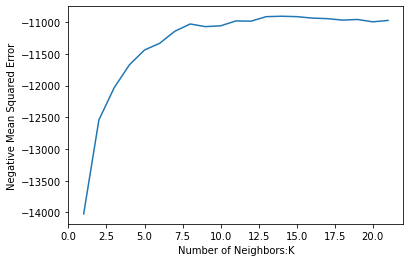

In [115]:
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors:K")
plt.ylabel("Negative Mean Squared Error")
plt.show()

#### Cluster 2 - CART

In [116]:
from sklearn import tree
fullClassTree = tree.DecisionTreeRegressor(random_state=1)
fullClassTree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [117]:
param_grid_tree = {'max_depth': [10,20,30,40],
             'min_samples_split': [20,40,60,80,100],
             'min_impurity_decrease': [ 0.05,0.005, 0.0001, 0.001, 0.01]}

In [118]:
grid_search_tree = GridSearchCV(tree.DecisionTreeRegressor(random_state=1),
                                param_grid=param_grid_tree,cv=num_folds,n_jobs=-1)

In [119]:
grid_search_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0.05, 0.005, 0.0001, 0.001,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [120]:
print('Initial score: ',grid_search_tree.best_score_)
print('Parameters: ',grid_search_tree.best_params_)

Initial score:  0.23392010449232553
Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.05, 'min_samples_split': 100}


max_depth': 10, 'min_samples_split': 80

In [121]:
param_grid_tree2 = {'max_depth': [4,6,8,10,12,14],
             'min_samples_split': [70, 75, 80, 85, 90],
             'min_impurity_decrease': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]}

In [122]:
grid_search_tree2 = GridSearchCV(tree.DecisionTreeRegressor(random_state=seed),
                                param_grid=param_grid_tree,cv=num_folds,n_jobs=-1)

In [123]:
grid_search_tree2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0.05, 0.005, 0.0001, 0.001,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [124]:
print('Initial score: ',grid_search_tree2.best_score_)
print('Parameters: ',grid_search_tree2.best_params_)

Initial score:  0.23392010449232536
Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.05, 'min_samples_split': 100}


In [125]:
y_pred = grid_search_tree2.predict(X_test)

In [126]:
print('MAE:', mean_absolute_error(y_test, y_pred))

MAE: 11666.399360239133


In [127]:
y_pred1 = grid_search_tree.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred1))

MAE: 11666.399360239133


#### Cluster 2 - Random Forest

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
param_grid_rfc = {'n_estimators' : [30,40,50,60,70,80],
                  'max_depth': [8,10,12,14,16,18,20],
             'min_samples_split': [16,18,20,22,24,26,28],
             'min_impurity_decrease': [0.01,0.005,0.001,0.0001,0.00001]}

In [130]:
grid_search_rfc = GridSearchCV(RandomForestRegressor(random_state=seed),
                               param_grid=param_grid_rfc,cv=5,n_jobs=-1)

In [131]:
grid_search_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 14, 16, 18, 20],
                         'min_impurity_decrease': [0.01, 0.005, 0.001, 0.0001,
                                                   1e-05],
                         'min_samples_split': [16, 18, 20, 22, 24, 26, 28],
                         'n_estimators': [30, 40, 50, 60, 70, 80]})

In [132]:
print('Best score: ',grid_search_rfc.best_score_)
print('Parameters: ',grid_search_rfc.best_params_)

Best score:  0.3739828636880291
Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 24, 'n_estimators': 30}


In [133]:
param_grid_rfc1 = {'n_estimators' : [36,38,40,42,44,46],
                  'max_depth': [10,11,12,13,14,15],
             'min_samples_split': [16,18,20,22,24,26,28],
             'min_impurity_decrease': [0.02,0.03,0.01,0.009,0.008,0.007]}

In [134]:
grid_search_rfc1 = GridSearchCV(RandomForestRegressor(random_state=seed),
                               param_grid=param_grid_rfc1,cv=5,n_jobs=-1)

In [135]:
grid_search_rfc1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=92), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15],
                         'min_impurity_decrease': [0.02, 0.03, 0.01, 0.009,
                                                   0.008, 0.007],
                         'min_samples_split': [16, 18, 20, 22, 24, 26, 28],
                         'n_estimators': [36, 38, 40, 42, 44, 46]})

In [136]:
print('Best score: ',grid_search_rfc.best_score_)
print('Parameters: ',grid_search_rfc.best_params_)

Best score:  0.3739828636880291
Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 24, 'n_estimators': 30}


In [137]:
y_pred_rf = grid_search_rfc1.predict(X_test)

In [138]:
print('MAE:', mean_absolute_error(y_test, y_pred_rf))

MAE: 10427.041769496953


For cluster 2 with 1662 records, KNN gave the best MAE.

Best: -17185.439315 using {'n_neighbors': 7}

#### Cluster 3 - KNN

In [139]:
filter3 = scaled_X['kmeans_cluster']==3
filter3

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: kmeans_cluster, Length: 5000, dtype: bool

In [140]:
y = pd.DataFrame(y)

In [141]:
X3 = scaled_X[scaled_X['kmeans_cluster']==3].drop(['kmeans_cluster'], axis = 1)
y3 = y[scaled_X['kmeans_cluster']==3]
y3 = y3.squeeze()
y3.shape

(76,)

In [142]:
test_size=0.3
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=test_size, random_state=seed)

In [143]:
num_folds = 5
scoring = 'neg_mean_absolute_error'

In [144]:
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
msg = "KNN: %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)

KNN: -16511.760549 (2973.989938)


In [145]:
k_values = np.arange(1,22)
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid=GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -15477.752848 using {'n_neighbors': 13}


In [146]:
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%F (%F) with: %r" % (mean, stdev, param))

-16721.280545 (3277.394250) with: {'n_neighbors': 1}
-17032.555355 (2439.949939) with: {'n_neighbors': 2}
-17405.566418 (1713.234265) with: {'n_neighbors': 3}
-17255.648477 (3025.894810) with: {'n_neighbors': 4}
-16511.760549 (2973.989938) with: {'n_neighbors': 5}
-15968.753961 (3430.014510) with: {'n_neighbors': 6}
-15683.245725 (3787.823255) with: {'n_neighbors': 7}
-15654.567336 (4370.886725) with: {'n_neighbors': 8}
-15896.111770 (4810.202823) with: {'n_neighbors': 9}
-15776.368162 (4855.109439) with: {'n_neighbors': 10}
-15823.642653 (5089.068893) with: {'n_neighbors': 11}
-15755.299400 (5100.141920) with: {'n_neighbors': 12}
-15477.752848 (5701.769007) with: {'n_neighbors': 13}
-15488.266931 (5645.402784) with: {'n_neighbors': 14}
-15523.774653 (5705.378994) with: {'n_neighbors': 15}
-15587.160299 (5515.010312) with: {'n_neighbors': 16}
-15875.488796 (5545.671620) with: {'n_neighbors': 17}
-16010.946263 (5608.604068) with: {'n_neighbors': 18}
-15916.054468 (5431.707135) with: {'n

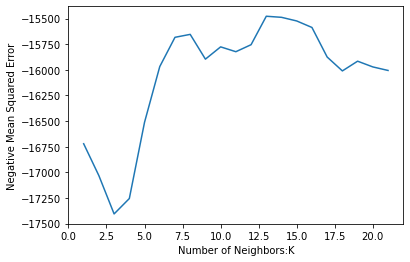

In [147]:
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors:K")
plt.ylabel("Negative Mean Squared Error")
plt.show()

#### Cluster 3 - CART

In [148]:
fullClassTree = tree.DecisionTreeRegressor(random_state=seed)
fullClassTree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [149]:
param_grid_tree = {'max_depth': [10,20,30,40],
             'min_samples_split': [20,40,60,80,100],
             'min_impurity_decrease': [ 0.05,0.005, 0.0001, 0.001, 0.01]}

In [150]:
grid_search_tree = GridSearchCV(tree.DecisionTreeRegressor(random_state=seed),
                                param_grid=param_grid_tree,cv=num_folds,n_jobs=-1)

In [151]:
grid_search_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0.05, 0.005, 0.0001, 0.001,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [152]:
print('Initial score: ',grid_search_tree.best_score_)
print('Parameters: ',grid_search_tree.best_params_)

Initial score:  -0.11036577912304937
Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.05, 'min_samples_split': 60}


In [153]:
y_pred1 = grid_search_tree.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred1))

MAE: 22949.72780968007


max_depth': 10, 'min_samples_split': 60

In [154]:
param_grid_tree2 = {'max_depth': [4,6,8,10,12,14],
             'min_samples_split': [50, 55, 60, 65, 70],
             'min_impurity_decrease': [ 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]}

In [155]:
grid_search_tree2 = GridSearchCV(tree.DecisionTreeRegressor(random_state=seed),
                                param_grid=param_grid_tree,cv=num_folds,n_jobs=-1)

In [156]:
grid_search_tree2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0.05, 0.005, 0.0001, 0.001,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [157]:
print('Initial score: ',grid_search_tree2.best_score_)
print('Parameters: ',grid_search_tree2.best_params_)

Initial score:  -0.11036577912304937
Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.05, 'min_samples_split': 60}


In [158]:
y_pred = grid_search_tree2.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))

MAE: 22949.72780968007


#### Cluster 3 - Random Forest

In [160]:
param_grid_rfc = {'n_estimators' : [30,40,50,60,70,80],
                  'max_depth': [6, 8,10,12,14,16,18,20],
             'min_samples_split': [16,18,20,22,24,26,28],
             'min_impurity_decrease': [0.05, 0.01,0.005,0.001,0.0001,0.00001]}

In [161]:
grid_search_rfc = GridSearchCV(RandomForestRegressor(random_state=seed),
                               param_grid=param_grid_rfc,cv=5,n_jobs=-1)

In [162]:
grid_search_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 14, 16, 18, 20],
                         'min_impurity_decrease': [0.05, 0.01, 0.005, 0.001,
                                                   0.0001, 1e-05],
                         'min_samples_split': [16, 18, 20, 22, 24, 26, 28],
                         'n_estimators': [30, 40, 50, 60, 70, 80]})

In [163]:
print('Best score: ',grid_search_rfc.best_score_)
print('Parameters: ',grid_search_rfc.best_params_)

Best score:  0.24363719519357882
Parameters:  {'max_depth': 6, 'min_impurity_decrease': 0.05, 'min_samples_split': 16, 'n_estimators': 80}


In [164]:
param_grid_rfc1 = {'n_estimators' : [36,38,40,42,44,46],
                  'max_depth': [10,11,12,13,14,15],
             'min_samples_split': [16,18,20,22,24,26,28],
             'min_impurity_decrease': [0.02,0.03,0.01,0.009,0.008,0.007]}

In [165]:
grid_search_rfc1 = GridSearchCV(RandomForestRegressor(random_state=seed),
                               param_grid=param_grid_rfc1,cv=5,n_jobs=-1)

In [166]:
grid_search_rfc1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=92), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15],
                         'min_impurity_decrease': [0.02, 0.03, 0.01, 0.009,
                                                   0.008, 0.007],
                         'min_samples_split': [16, 18, 20, 22, 24, 26, 28],
                         'n_estimators': [36, 38, 40, 42, 44, 46]})

In [167]:
print('Best score: ',grid_search_rfc.best_score_)
print('Parameters: ',grid_search_rfc.best_params_)

Best score:  0.24363719519357882
Parameters:  {'max_depth': 6, 'min_impurity_decrease': 0.05, 'min_samples_split': 16, 'n_estimators': 80}


In [168]:
y_pred_rf = grid_search_rfc1.predict(X_test)

In [169]:
print('MSE:', mean_absolute_error(y_test, y_pred_rf))

MSE: 18620.505662864114


#### Cluster 4 - KNN

In [170]:
filter4 = scaled_X['kmeans_cluster']==4
filter4

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996     True
4997    False
4998    False
4999    False
Name: kmeans_cluster, Length: 5000, dtype: bool

In [171]:
y = pd.DataFrame(y)

In [172]:
X4 = scaled_X[scaled_X['kmeans_cluster']==4].drop(['kmeans_cluster'], axis = 1)
y4 = y[scaled_X['kmeans_cluster']==4]
y4 = y4.squeeze()
y4.shape

(455,)

In [173]:
test_size=0.3
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=test_size, random_state=seed)

In [174]:
num_folds = 5
scoring = 'neg_mean_absolute_error'

In [175]:
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
msg = "KNN: %f (%f)" % (cv_results.mean(), cv_results.std())
print(msg)

KNN: -16408.979217 (2010.235656)


In [176]:
k_values = np.arange(1,22)
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid=GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -15424.457052 using {'n_neighbors': 21}


In [177]:
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params): 
    print("%F (%F) with: %r" % (mean, stdev, param))

-20316.383438 (2767.822951) with: {'n_neighbors': 1}
-17622.365859 (1678.464566) with: {'n_neighbors': 2}
-16809.544292 (1862.805295) with: {'n_neighbors': 3}
-16505.966017 (1996.106484) with: {'n_neighbors': 4}
-16408.979217 (2010.235656) with: {'n_neighbors': 5}
-16279.517729 (2336.728878) with: {'n_neighbors': 6}
-16132.881266 (2329.864872) with: {'n_neighbors': 7}
-15863.722146 (2027.233959) with: {'n_neighbors': 8}
-15930.401652 (1798.481200) with: {'n_neighbors': 9}
-15942.077606 (1684.518309) with: {'n_neighbors': 10}
-15767.340351 (1970.760995) with: {'n_neighbors': 11}
-15969.229996 (2084.553357) with: {'n_neighbors': 12}
-15845.474370 (2156.193069) with: {'n_neighbors': 13}
-15930.734595 (2153.946426) with: {'n_neighbors': 14}
-15931.808710 (2123.420173) with: {'n_neighbors': 15}
-15845.351816 (2143.669220) with: {'n_neighbors': 16}
-15628.087421 (2153.623162) with: {'n_neighbors': 17}
-15613.120771 (2134.804070) with: {'n_neighbors': 18}
-15607.933442 (2244.593628) with: {'n

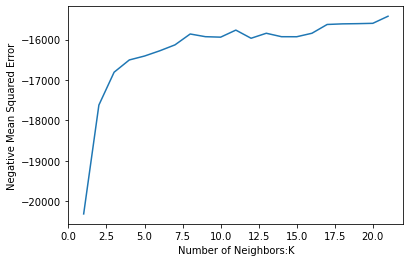

In [178]:
plt.plot(k_values, means)
plt.xlabel("Number of Neighbors:K")
plt.ylabel("Negative Mean Squared Error")
plt.show()

#### Cluster 4 - CART

In [179]:
fullClassTree = tree.DecisionTreeRegressor(random_state=seed)
fullClassTree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [180]:
param_grid_tree = {'max_depth': [10,20,30,40],
             'min_samples_split': [20,40,60,80,100],
             'min_impurity_decrease': [ 0.05,0.005, 0.0001, 0.001, 0.01]}

In [181]:
grid_search_tree = GridSearchCV(tree.DecisionTreeRegressor(random_state=seed),
                                param_grid=param_grid_tree,cv=num_folds,n_jobs=-1)

In [182]:
grid_search_tree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0.05, 0.005, 0.0001, 0.001,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [183]:
print('Initial score: ',grid_search_tree.best_score_)
print('Parameters: ',grid_search_tree.best_params_)

Initial score:  0.07655802172430155
Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.05, 'min_samples_split': 100}


In [184]:
y_pred1 = grid_search_tree.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred1))

MAE: 14172.69331877163


max_depth': 10, 'min_samples_split': 80

In [185]:
param_grid_tree2 = {'max_depth': [4,6,8,10,12,14],
             'min_samples_split': [70, 75, 80, 85, 90],
             'min_impurity_decrease': [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05]}

In [186]:
grid_search_tree2 = GridSearchCV(tree.DecisionTreeRegressor(random_state=seed),
                                param_grid=param_grid_tree,cv=num_folds,n_jobs=-1)

In [187]:
grid_search_tree2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_impurity_decrease': [0.05, 0.005, 0.0001, 0.001,
                                                   0.01],
                         'min_samples_split': [20, 40, 60, 80, 100]})

In [188]:
print('Initial score: ',grid_search_tree2.best_score_)
print('Parameters: ',grid_search_tree2.best_params_)

Initial score:  0.0765580217243014
Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.05, 'min_samples_split': 100}


In [189]:
y_pred = grid_search_tree2.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))

MAE: 14172.693318771639


#### Cluster 4 - Random Forest

In [191]:
param_grid_rfc = {'n_estimators' : [30,40,50,60,70,80],
                  'max_depth': [8,10,12,14,16,18,20],
             'min_samples_split': [16,18,20,22,24,26,28],
             'min_impurity_decrease': [0.01,0.005,0.001,0.0001,0.00001]}

In [192]:
grid_search_rfc = GridSearchCV(RandomForestRegressor(random_state=seed),
                               param_grid=param_grid_rfc,cv=5,n_jobs=-1)

In [193]:
grid_search_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 14, 16, 18, 20],
                         'min_impurity_decrease': [0.01, 0.005, 0.001, 0.0001,
                                                   1e-05],
                         'min_samples_split': [16, 18, 20, 22, 24, 26, 28],
                         'n_estimators': [30, 40, 50, 60, 70, 80]})

In [194]:
print('Best score: ',grid_search_rfc.best_score_)
print('Parameters: ',grid_search_rfc.best_params_)

Best score:  0.2164535558731952
Parameters:  {'max_depth': 8, 'min_impurity_decrease': 0.01, 'min_samples_split': 28, 'n_estimators': 70}


In [195]:
param_grid_rfc1 = {'n_estimators' : [36,38,40,42,44,46],
                  'max_depth': [10,11,12,13,14,15],
             'min_samples_split': [16,18,20,22,24,26,28],
             'min_impurity_decrease': [0.02,0.03,0.01,0.009,0.008,0.007]}

In [196]:
grid_search_rfc1 = GridSearchCV(RandomForestRegressor(random_state=seed),
                               param_grid=param_grid_rfc1,cv=5,n_jobs=-1)

In [197]:
grid_search_rfc1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=92), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15],
                         'min_impurity_decrease': [0.02, 0.03, 0.01, 0.009,
                                                   0.008, 0.007],
                         'min_samples_split': [16, 18, 20, 22, 24, 26, 28],
                         'n_estimators': [36, 38, 40, 42, 44, 46]})

In [198]:
print('Best score: ',grid_search_rfc.best_score_)
print('Parameters: ',grid_search_rfc.best_params_)

Best score:  0.2164535558731952
Parameters:  {'max_depth': 8, 'min_impurity_decrease': 0.01, 'min_samples_split': 28, 'n_estimators': 70}


In [199]:
y_pred_rf = grid_search_rfc1.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred_rf))

MAE: 12580.071167979222


### Prediction for Test Set

In [234]:
df_test_null = pd.read_csv('CensusCanada2016Test.csv')

In [235]:
df_test_null.columns = df_test_null.columns.str.replace(' ', '_')

In [237]:
df_test_null['Density'] = (df_test_null['Total_Population']/df_test_null['Total_Households']).fillna(0) #fill in 0 to resolve the division by zero problem
df_test_null['Total_Households_Built_before_2005'] = df_test_null.iloc[:, 5:9].sum(axis=1)
df_test_null['Total_Households_Built_Between_2006_2016'] = df_test_null['Total_Households_For_Period_Of_Construction']- df_test_null['Total_Households_Built_before_2005']

In [238]:
df_test_null = df_test_null.drop(['Total_Households',
               'Total_Households_For_Period_Of_Construction', 
               'Total_Households_for_Tenure',
               'Total_Households_Built_before_2005',
               'Dwellings_by_Tenure_Owner', 
               'Total_Households_For_Structure_Type_Apartment,_Building_Low_And_High_Rise'
               ], axis=1)

In [239]:
df_test=(df_test_null-df_test_null.mean())/df_test_null.std()
df_test

,Total_Population,Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,Total_Households_For_Structure_Type_Other_Dwelling_Types,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_Between_2006_2016
0,-0.866887,-0.836214,-1.181890,-0.841952,1.497220,-0.156799,-0.297509,-0.255329,-0.957941,0.720063,-1.009098
1,-0.398070,-0.831551,0.664519,-0.149031,-0.796781,-0.493265,-0.116238,-0.255329,-0.713482,-0.030457,0.063142
2,0.832968,0.917158,0.158901,-0.128888,0.710389,0.059203,0.349706,-0.255329,0.671227,-0.092184,0.431925
3,1.667557,2.719494,0.957959,0.733235,0.004826,1.267986,1.258616,-0.010549,2.029147,-1.001263,1.266481
4,-0.504262,-0.768598,-1.017113,-0.890295,-0.471705,0.133973,-0.060069,-0.255329,-0.971336,0.859109,-0.409027
...,...,...,...,...,...,...,...,...,...,...,...
716,-1.847391,-0.871188,-1.157061,-0.970867,-0.852192,-0.630343,-1.354499,-0.097970,-1.019893,0.880312,-0.176673
717,-0.704846,0.991769,0.068612,-0.277946,-0.475399,-0.526496,-1.230673,-0.167908,1.302467,-1.321221,1.164160
718,-1.405712,-0.031808,-1.001312,-1.015182,-0.855886,-0.630343,-0.810685,-0.255329,-0.914407,0.084873,-0.152159
719,-0.239176,-0.341913,0.018953,0.616405,-0.560362,-0.551419,0.034396,-0.255329,-0.772085,0.880522,-0.459122


In [241]:
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(df_test)
pred = kmeans.predict(df_test)

In [242]:
df_test['kmeans_cluster'] = kmeans.labels_
df_test['kmeans_cluster'].value_counts()

0    258
1    201
3    168
2     92
4      2
Name: kmeans_cluster, dtype: int64

#### Cluster 0 

Best model for cluster 0 is Random Forest

Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 26, 'n_estimators': 30}

In [251]:
#filter0 = df_test['kmeans_cluster']==0
X0_test = df_test[df_test['kmeans_cluster']==0].drop(['kmeans_cluster'], axis = 1)
X0_test

,Total_Population,Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,Total_Households_For_Structure_Type_Other_Dwelling_Types,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_Between_2006_2016
0,-0.866887,-0.836214,-1.181890,-0.841952,1.497220,-0.156799,-0.297509,-0.255329,-0.957941,0.720063,-1.009098
1,-0.398070,-0.831551,0.664519,-0.149031,-0.796781,-0.493265,-0.116238,-0.255329,-0.713482,-0.030457,0.063142
4,-0.504262,-0.768598,-1.017113,-0.890295,-0.471705,0.133973,-0.060069,-0.255329,-0.971336,0.859109,-0.409027
6,-1.207094,-0.274296,-0.247399,-0.713036,-0.785699,-0.630343,-0.551544,-0.255329,-0.775434,-0.515058,-0.150027
9,-0.031512,0.227001,-0.466350,-0.209460,-0.183570,-0.003105,0.389279,-0.202876,-0.589578,0.709183,-0.549719
...,...,...,...,...,...,...,...,...,...,...,...
702,-1.275922,0.537105,-0.886194,-0.995039,-0.826333,-0.630343,-1.405561,-0.150423,-0.119078,-0.927848,0.660015
710,-1.130793,-0.724297,-0.757532,-0.116802,-0.419989,-0.559727,-0.612819,-0.150423,-0.932825,-0.012516,-0.398369
714,-0.817724,0.884515,-0.500208,-0.910438,-0.730288,-0.484957,-0.481333,0.304169,-0.402048,-0.886898,0.392488
716,-1.847391,-0.871188,-1.157061,-0.970867,-0.852192,-0.630343,-1.354499,-0.097970,-1.019893,0.880312,-0.176673


In [244]:
param_grid_rfc1 = {'n_estimators' : [30],
                  'max_depth': [10],
             'min_samples_split': [26],
             'min_impurity_decrease': [0.01]}

In [245]:
grid_search_rfc1 = GridSearchCV(RandomForestRegressor(random_state=seed),
                               param_grid=param_grid_rfc1,cv=5,n_jobs=-1)

In [246]:
grid_search_rfc1.fit(X0, y0)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_impurity_decrease': [0.01],
                         'min_samples_split': [26], 'n_estimators': [30]})

In [252]:
y0_test = grid_search_rfc1.predict(X0_test)

In [253]:
X0_test['Predicted_Income'] = y0_test
X0_test

,Total_Population,Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,Total_Households_For_Structure_Type_Other_Dwelling_Types,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_Between_2006_2016,Predicted_Income
0,-0.866887,-0.836214,-1.181890,-0.841952,1.497220,-0.156799,-0.297509,-0.255329,-0.957941,0.720063,-1.009098,107482.443914
1,-0.398070,-0.831551,0.664519,-0.149031,-0.796781,-0.493265,-0.116238,-0.255329,-0.713482,-0.030457,0.063142,94233.624204
4,-0.504262,-0.768598,-1.017113,-0.890295,-0.471705,0.133973,-0.060069,-0.255329,-0.971336,0.859109,-0.409027,111419.880942
6,-1.207094,-0.274296,-0.247399,-0.713036,-0.785699,-0.630343,-0.551544,-0.255329,-0.775434,-0.515058,-0.150027,68457.749667
9,-0.031512,0.227001,-0.466350,-0.209460,-0.183570,-0.003105,0.389279,-0.202876,-0.589578,0.709183,-0.549719,94883.334874
...,...,...,...,...,...,...,...,...,...,...,...,...
702,-1.275922,0.537105,-0.886194,-0.995039,-0.826333,-0.630343,-1.405561,-0.150423,-0.119078,-0.927848,0.660015,50611.185360
710,-1.130793,-0.724297,-0.757532,-0.116802,-0.419989,-0.559727,-0.612819,-0.150423,-0.932825,-0.012516,-0.398369,89522.236662
714,-0.817724,0.884515,-0.500208,-0.910438,-0.730288,-0.484957,-0.481333,0.304169,-0.402048,-0.886898,0.392488,59393.345663
716,-1.847391,-0.871188,-1.157061,-0.970867,-0.852192,-0.630343,-1.354499,-0.097970,-1.019893,0.880312,-0.176673,94884.102839


#### Cluster 1 

Best Model: Random Forest

Parameters:  {'max_depth': 14, 'min_impurity_decrease': 0.01, 'min_samples_split': 18, 'n_estimators': 80}

In [254]:
X1_test = df_test[df_test['kmeans_cluster']==1].drop(['kmeans_cluster'], axis = 1)
X1_test

,Total_Population,Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,Total_Households_For_Structure_Type_Other_Dwelling_Types,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_Between_2006_2016
7,0.955285,-0.642691,2.255863,0.439147,-0.471705,-0.460034,-0.006454,-0.255329,0.055057,1.171740,0.482019
8,-0.050784,-0.554089,-0.139053,-0.209460,0.322514,-0.156799,0.639485,0.321653,-0.877571,0.508015,-0.812983
11,0.322068,-0.845541,-0.186454,2.868399,0.211693,-0.003105,0.653527,-0.150423,-0.405396,0.435383,-1.264901
13,-0.157762,-0.705644,-0.685301,0.507633,0.329902,-0.322955,0.278219,-0.150423,-0.780457,0.507553,-0.760756
17,-0.274573,-0.840878,-0.157110,0.870208,-0.748759,-0.576343,-0.109855,-0.167908,-0.947894,2.017069,-0.631789
...,...,...,...,...,...,...,...,...,...,...,...
709,0.808583,-0.278959,-0.080365,0.676835,1.800131,-0.206646,0.996921,-0.167908,-0.479069,0.624980,-1.013362
711,-0.257661,-0.787250,0.425254,1.228754,-0.124465,-0.543111,0.625443,-0.255329,-0.494138,0.057892,-0.988847
713,0.480569,-0.666007,2.576389,0.604320,0.322514,-0.497419,0.949688,-0.202876,-0.045406,-0.610704,-0.030652
719,-0.239176,-0.341913,0.018953,0.616405,-0.560362,-0.551419,0.034396,-0.255329,-0.772085,0.880522,-0.459122


In [256]:
param_grid_rfc1 = {'n_estimators' : [80],
                  'max_depth': [14],
             'min_samples_split': [18],
             'min_impurity_decrease': [0.01]}

In [257]:
grid_search_rfc1 = GridSearchCV(RandomForestRegressor(random_state=seed),
                               param_grid=param_grid_rfc1,cv=5,n_jobs=-1)

In [258]:
grid_search_rfc1.fit(X1, y1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [14], 'min_impurity_decrease': [0.01],
                         'min_samples_split': [18], 'n_estimators': [80]})

In [259]:
y1_test = grid_search_rfc1.predict(X1_test)

In [260]:
X1_test['Predicted_Income'] = y1_test
X1_test

,Total_Population,Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,Total_Households_For_Structure_Type_Other_Dwelling_Types,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_Between_2006_2016,Predicted_Income
7,0.955285,-0.642691,2.255863,0.439147,-0.471705,-0.460034,-0.006454,-0.255329,0.055057,1.171740,0.482019,76665.026341
8,-0.050784,-0.554089,-0.139053,-0.209460,0.322514,-0.156799,0.639485,0.321653,-0.877571,0.508015,-0.812983,114919.132455
11,0.322068,-0.845541,-0.186454,2.868399,0.211693,-0.003105,0.653527,-0.150423,-0.405396,0.435383,-1.264901,88089.116660
13,-0.157762,-0.705644,-0.685301,0.507633,0.329902,-0.322955,0.278219,-0.150423,-0.780457,0.507553,-0.760756,102273.975366
17,-0.274573,-0.840878,-0.157110,0.870208,-0.748759,-0.576343,-0.109855,-0.167908,-0.947894,2.017069,-0.631789,107541.577239
...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.808583,-0.278959,-0.080365,0.676835,1.800131,-0.206646,0.996921,-0.167908,-0.479069,0.624980,-1.013362,99736.505963
711,-0.257661,-0.787250,0.425254,1.228754,-0.124465,-0.543111,0.625443,-0.255329,-0.494138,0.057892,-0.988847,93312.603809
713,0.480569,-0.666007,2.576389,0.604320,0.322514,-0.497419,0.949688,-0.202876,-0.045406,-0.610704,-0.030652,77423.670054
719,-0.239176,-0.341913,0.018953,0.616405,-0.560362,-0.551419,0.034396,-0.255329,-0.772085,0.880522,-0.459122,97803.529288


#### Cluster 2 

Best Model: Random Forest 

Parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 24, 'n_estimators': 30}

In [275]:
X2_test = df_test[df_test['kmeans_cluster']==2].drop(['kmeans_cluster'], axis = 1)
X2_test

,Total_Population,Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,Total_Households_For_Structure_Type_Other_Dwelling_Types,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_Between_2006_2016
12,0.967478,-0.738287,0.095699,0.269945,1.415951,0.607517,1.672220,-0.255329,-0.803898,0.728761,-1.475939
15,0.920281,-0.871188,-0.694330,-0.008029,1.644982,1.321986,1.595627,-0.255329,-0.758690,0.783135,-1.657132
16,1.725765,-0.803572,-0.434749,2.006276,3.045024,3.968016,1.803706,-0.255329,0.336352,-0.457000,-1.705095
30,0.171826,-0.847872,-0.892966,-0.342404,0.983748,1.820454,0.234816,-0.255329,-0.547718,1.064686,-1.130605
35,-0.553425,-0.871188,-1.195434,-0.414919,0.662366,1.097676,0.113543,-0.255329,-0.936174,0.498517,-1.208411
...,...,...,...,...,...,...,...,...,...,...,...
667,0.584401,-0.871188,-1.229292,-1.027268,-0.589915,1.903531,0.284602,-0.255329,-0.887617,3.131192,-0.792732
680,0.379883,-0.836214,-1.175119,0.551948,2.812299,1.189062,0.851393,-0.255329,-0.803898,0.745245,-1.951306
682,0.987536,-0.871188,-1.229292,-1.027268,-0.774617,1.982455,0.444171,-0.255329,-0.867524,3.459020,-0.721320
695,2.631935,-0.871188,-1.229292,-1.027268,-0.830027,-0.298032,2.644958,-0.255329,-0.581206,1.716865,-0.234229


In [276]:
param_grid_rfc1 = {'n_estimators' : [30],
                  'max_depth': [10],
             'min_samples_split': [24],
             'min_impurity_decrease': [0.01]}

In [277]:
grid_search_rfc1 = GridSearchCV(RandomForestRegressor(random_state=seed),
                               param_grid=param_grid_rfc1,cv=5,n_jobs=-1)

In [278]:
grid_search_rfc1.fit(X2, y2)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_impurity_decrease': [0.01],
                         'min_samples_split': [24], 'n_estimators': [30]})

In [279]:
y2_test = grid_search_rfc1.predict(X2_test)

In [280]:
X2_test['Predicted_Income'] = y2_test
X2_test

,Total_Population,Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,Total_Households_For_Structure_Type_Other_Dwelling_Types,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_Between_2006_2016,Predicted_Income
12,0.967478,-0.738287,0.095699,0.269945,1.415951,0.607517,1.672220,-0.255329,-0.803898,0.728761,-1.475939,110103.418296
15,0.920281,-0.871188,-0.694330,-0.008029,1.644982,1.321986,1.595627,-0.255329,-0.758690,0.783135,-1.657132,111091.152326
16,1.725765,-0.803572,-0.434749,2.006276,3.045024,3.968016,1.803706,-0.255329,0.336352,-0.457000,-1.705095,104690.245165
30,0.171826,-0.847872,-0.892966,-0.342404,0.983748,1.820454,0.234816,-0.255329,-0.547718,1.064686,-1.130605,107365.459894
35,-0.553425,-0.871188,-1.195434,-0.414919,0.662366,1.097676,0.113543,-0.255329,-0.936174,0.498517,-1.208411,145706.159475
...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.584401,-0.871188,-1.229292,-1.027268,-0.589915,1.903531,0.284602,-0.255329,-0.887617,3.131192,-0.792732,159754.067971
680,0.379883,-0.836214,-1.175119,0.551948,2.812299,1.189062,0.851393,-0.255329,-0.803898,0.745245,-1.951306,148254.981917
682,0.987536,-0.871188,-1.229292,-1.027268,-0.774617,1.982455,0.444171,-0.255329,-0.867524,3.459020,-0.721320,160272.084701
695,2.631935,-0.871188,-1.229292,-1.027268,-0.830027,-0.298032,2.644958,-0.255329,-0.581206,1.716865,-0.234229,164044.419851


#### Cluster 3 

Best Model: KNN

{'n_neighbors': 13}

In [267]:
X3_test = df_test[df_test['kmeans_cluster']==3].drop(['kmeans_cluster'], axis = 1)
X3_test

,Total_Population,Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,Total_Households_For_Structure_Type_Other_Dwelling_Types,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_Between_2006_2016
2,0.832968,0.917158,0.158901,-0.128888,0.710389,0.059203,0.349706,-0.255329,0.671227,-0.092184,0.431925
3,1.667557,2.719494,0.957959,0.733235,0.004826,1.267986,1.258616,-0.010549,2.029147,-1.001263,1.266481
5,0.651655,1.933740,2.032398,-0.350461,-0.671184,-0.489111,0.007589,-0.255329,0.261005,-0.676916,1.557457
21,0.020798,3.176490,0.149872,-0.713036,-0.789393,-0.630343,0.317792,-0.010549,0.783411,-1.043751,0.948860
31,-0.519207,1.604983,-0.567925,-0.511606,-0.634243,-0.206646,-1.275352,-0.080486,1.166843,-1.188837,1.417831
...,...,...,...,...,...,...,...,...,...,...,...
707,-0.203385,0.054461,1.628354,0.241745,-0.552974,-0.538958,-1.166845,-0.167908,1.948777,-1.047052,1.538272
708,1.235710,0.994101,1.149823,1.353641,0.972666,0.686441,-0.227298,-0.167908,2.387463,-1.265400,1.991256
712,-0.052750,0.940474,1.626097,-0.132916,-0.349802,-0.314647,-0.841323,-0.167908,1.714364,-1.208702,1.588367
715,-0.093654,2.257835,0.520057,-0.394776,-0.630549,-0.518188,0.162052,-0.185392,0.821921,-1.144414,0.841209


In [272]:
model = KNeighborsRegressor(n_neighbors = 13)
model.fit(X3, y3)
y3_test=model.predict(X3_test)

In [274]:
X3_test['Predicted_Income'] = y3_test
X3_test

,Total_Population,Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,Total_Households_For_Structure_Type_Other_Dwelling_Types,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_Between_2006_2016,Predicted_Income
2,0.832968,0.917158,0.158901,-0.128888,0.710389,0.059203,0.349706,-0.255329,0.671227,-0.092184,0.431925,84612.277692
3,1.667557,2.719494,0.957959,0.733235,0.004826,1.267986,1.258616,-0.010549,2.029147,-1.001263,1.266481,72549.801538
5,0.651655,1.933740,2.032398,-0.350461,-0.671184,-0.489111,0.007589,-0.255329,0.261005,-0.676916,1.557457,76873.201538
21,0.020798,3.176490,0.149872,-0.713036,-0.789393,-0.630343,0.317792,-0.010549,0.783411,-1.043751,0.948860,78858.368462
31,-0.519207,1.604983,-0.567925,-0.511606,-0.634243,-0.206646,-1.275352,-0.080486,1.166843,-1.188837,1.417831,72278.901538
...,...,...,...,...,...,...,...,...,...,...,...,...
707,-0.203385,0.054461,1.628354,0.241745,-0.552974,-0.538958,-1.166845,-0.167908,1.948777,-1.047052,1.538272,74643.213077
708,1.235710,0.994101,1.149823,1.353641,0.972666,0.686441,-0.227298,-0.167908,2.387463,-1.265400,1.991256,71360.732308
712,-0.052750,0.940474,1.626097,-0.132916,-0.349802,-0.314647,-0.841323,-0.167908,1.714364,-1.208702,1.588367,75096.023077
715,-0.093654,2.257835,0.520057,-0.394776,-0.630549,-0.518188,0.162052,-0.185392,0.821921,-1.144414,0.841209,78173.000000


#### Cluster 4 

Best Model: Random Forest

Parameters:  {'max_depth': 8, 'min_impurity_decrease': 0.01, 'min_samples_split': 28, 'n_estimators': 70}

In [282]:
X4_test = df_test[df_test['kmeans_cluster']==4].drop(['kmeans_cluster'], axis = 1)
X4_test

,Total_Population,Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,Total_Households_For_Structure_Type_Other_Dwelling_Types,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_Between_2006_2016
95,1.145250,-0.871188,-0.850078,-0.406862,-0.386742,1.085215,1.010963,12.945323,-0.361863,0.096974,0.201702
574,-1.135906,-0.840878,-0.197740,-0.427005,-0.726594,-0.397725,-1.387690,15.637906,-0.862501,-0.756781,0.542772


In [281]:
param_grid_rfc1 = {'n_estimators' : [70],
                  'max_depth': [8],
             'min_samples_split': [28],
             'min_impurity_decrease': [0.01]}

In [283]:
grid_search_rfc1 = GridSearchCV(RandomForestRegressor(random_state=seed),
                               param_grid=param_grid_rfc1,cv=5,n_jobs=-1)

In [284]:
grid_search_rfc1.fit(X4, y4)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [8], 'min_impurity_decrease': [0.01],
                         'min_samples_split': [28], 'n_estimators': [70]})

In [285]:
y4_test = grid_search_rfc1.predict(X4_test)

In [286]:
X4_test['Predicted_Income'] = y4_test
X4_test

,Total_Population,Total_Households_For_Period_Of_Construction_Built_Before_1961,Total_Households_For_Period_Of_Construction_Built_Between_1961_And_1980,Total_Households_For_Period_Of_Construction_Built_Between_1981_And_190,Total_Households_For_Period_Of_Construction_Built_Between_1991_And_2000,Total_Households_For_Period_Of_Construction_Built_Between_2001_And_2005,Total_Households_For_Structure_Type_Houses,Total_Households_For_Structure_Type_Other_Dwelling_Types,Dwellings_by_Tenure_Renter,Density,Total_Households_Built_Between_2006_2016,Predicted_Income
95,1.145250,-0.871188,-0.850078,-0.406862,-0.386742,1.085215,1.010963,12.945323,-0.361863,0.096974,0.201702,100056.972476
574,-1.135906,-0.840878,-0.197740,-0.427005,-0.726594,-0.397725,-1.387690,15.637906,-0.862501,-0.756781,0.542772,80236.973258


In [297]:
df_output = pd.concat([X0_test, X1_test, X2_test, X3_test, X4_test])

In [298]:
df_output = df_output.sort_index()

In [301]:
df_output['Predicted_Income']

0      107482.443914
1       94233.624204
2       84612.277692
3       72549.801538
4      111419.880942
           ...      
716     94884.102839
717     73232.325385
718    117249.536874
719     97803.529288
720     81845.195457
Name: Predicted_Income, Length: 721, dtype: float64

In [304]:
numpy_array = df_output['Predicted_Income'].to_numpy()
np.savetxt("Team13predictions.txt", numpy_array, fmt = "%1.2f")